In [147]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import graphviz
import pydotplus
from sklearn import tree
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,accuracy_score, precision_score, recall_score, classification_report, precision_recall_curve, roc_curve

In [88]:
dataset = load_breast_cancer(as_frame=True)

In [89]:
X = dataset.data
y = dataset.target

In [90]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [91]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

In [92]:
X.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [93]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [94]:
Y_df = pd.DataFrame(y, columns = ['target'])
Y_df

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [128]:
Y_df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X,Y_df, test_size=0.20, random_state=42)

In [96]:
decision_tree = DecisionTreeClassifier(random_state=0)
cross_val_score(decision_tree, X ,Y_df, cv=10)

array([0.96491228, 0.84210526, 0.9122807 , 0.89473684, 0.92982456,
       0.89473684, 0.9122807 , 0.94736842, 0.92982456, 0.94642857])

In [97]:
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [98]:
depth = decision_tree.tree_.max_depth
depth

7

In [99]:
print('Leaves of tree: ',decision_tree.get_n_leaves())

Leaves of tree:  16


In [100]:
train_score=decision_tree.score(X_train,y_train,sample_weight=None)
test_score=decision_tree.score(X_test,y_test,sample_weight=None)

In [101]:
print('Train Score: ',train_score)
print('Test Score: ',test_score)

Train Score:  1.0
Test Score:  0.9385964912280702


In [102]:
predictions = decision_tree.predict(X_test)

In [103]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  67
False Positive(FP) =  3
True Negative(TN)  =  40
False Negative(FN) =  4


/Users/aishakothare/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


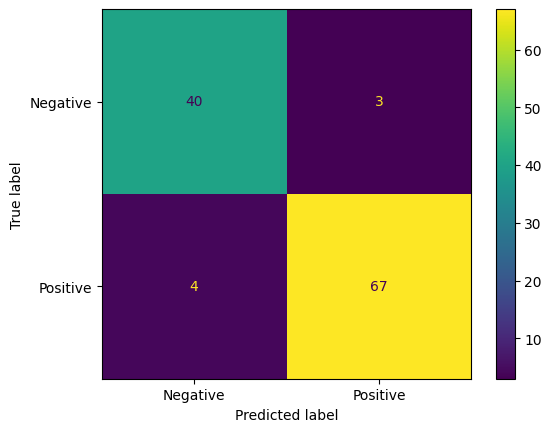

In [124]:
metrics.plot_confusion_matrix(decision_tree, X_test, y_test, display_labels=['Negative', 'Positive'])

In [150]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions).ravel()
recall = recall_score(y_test, predictions).ravel()
f11 = f1_score(y_test, predictions)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))
print('Precision of the binary classifier = {:0.3f}'.format(precision[0]))
print('Recall of the binary classifier = {:0.3f}'.format(recall[0]))
print('F1 score of the binary classifier = {:0.3f}'.format(f11))

Accuracy of the binary classifier = 0.939
Precision of the binary classifier = 0.957
Recall of the binary classifier = 0.944
F1 score of the binary classifier = 0.950


In [105]:
print("Classification report for depth 1:\n%s\n",(classification_report(y_test,predictions)))

Classification report for depth 1:
%s
               precision    recall  f1-score   support

           0       0.91      0.93      0.92        43
           1       0.96      0.94      0.95        71

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



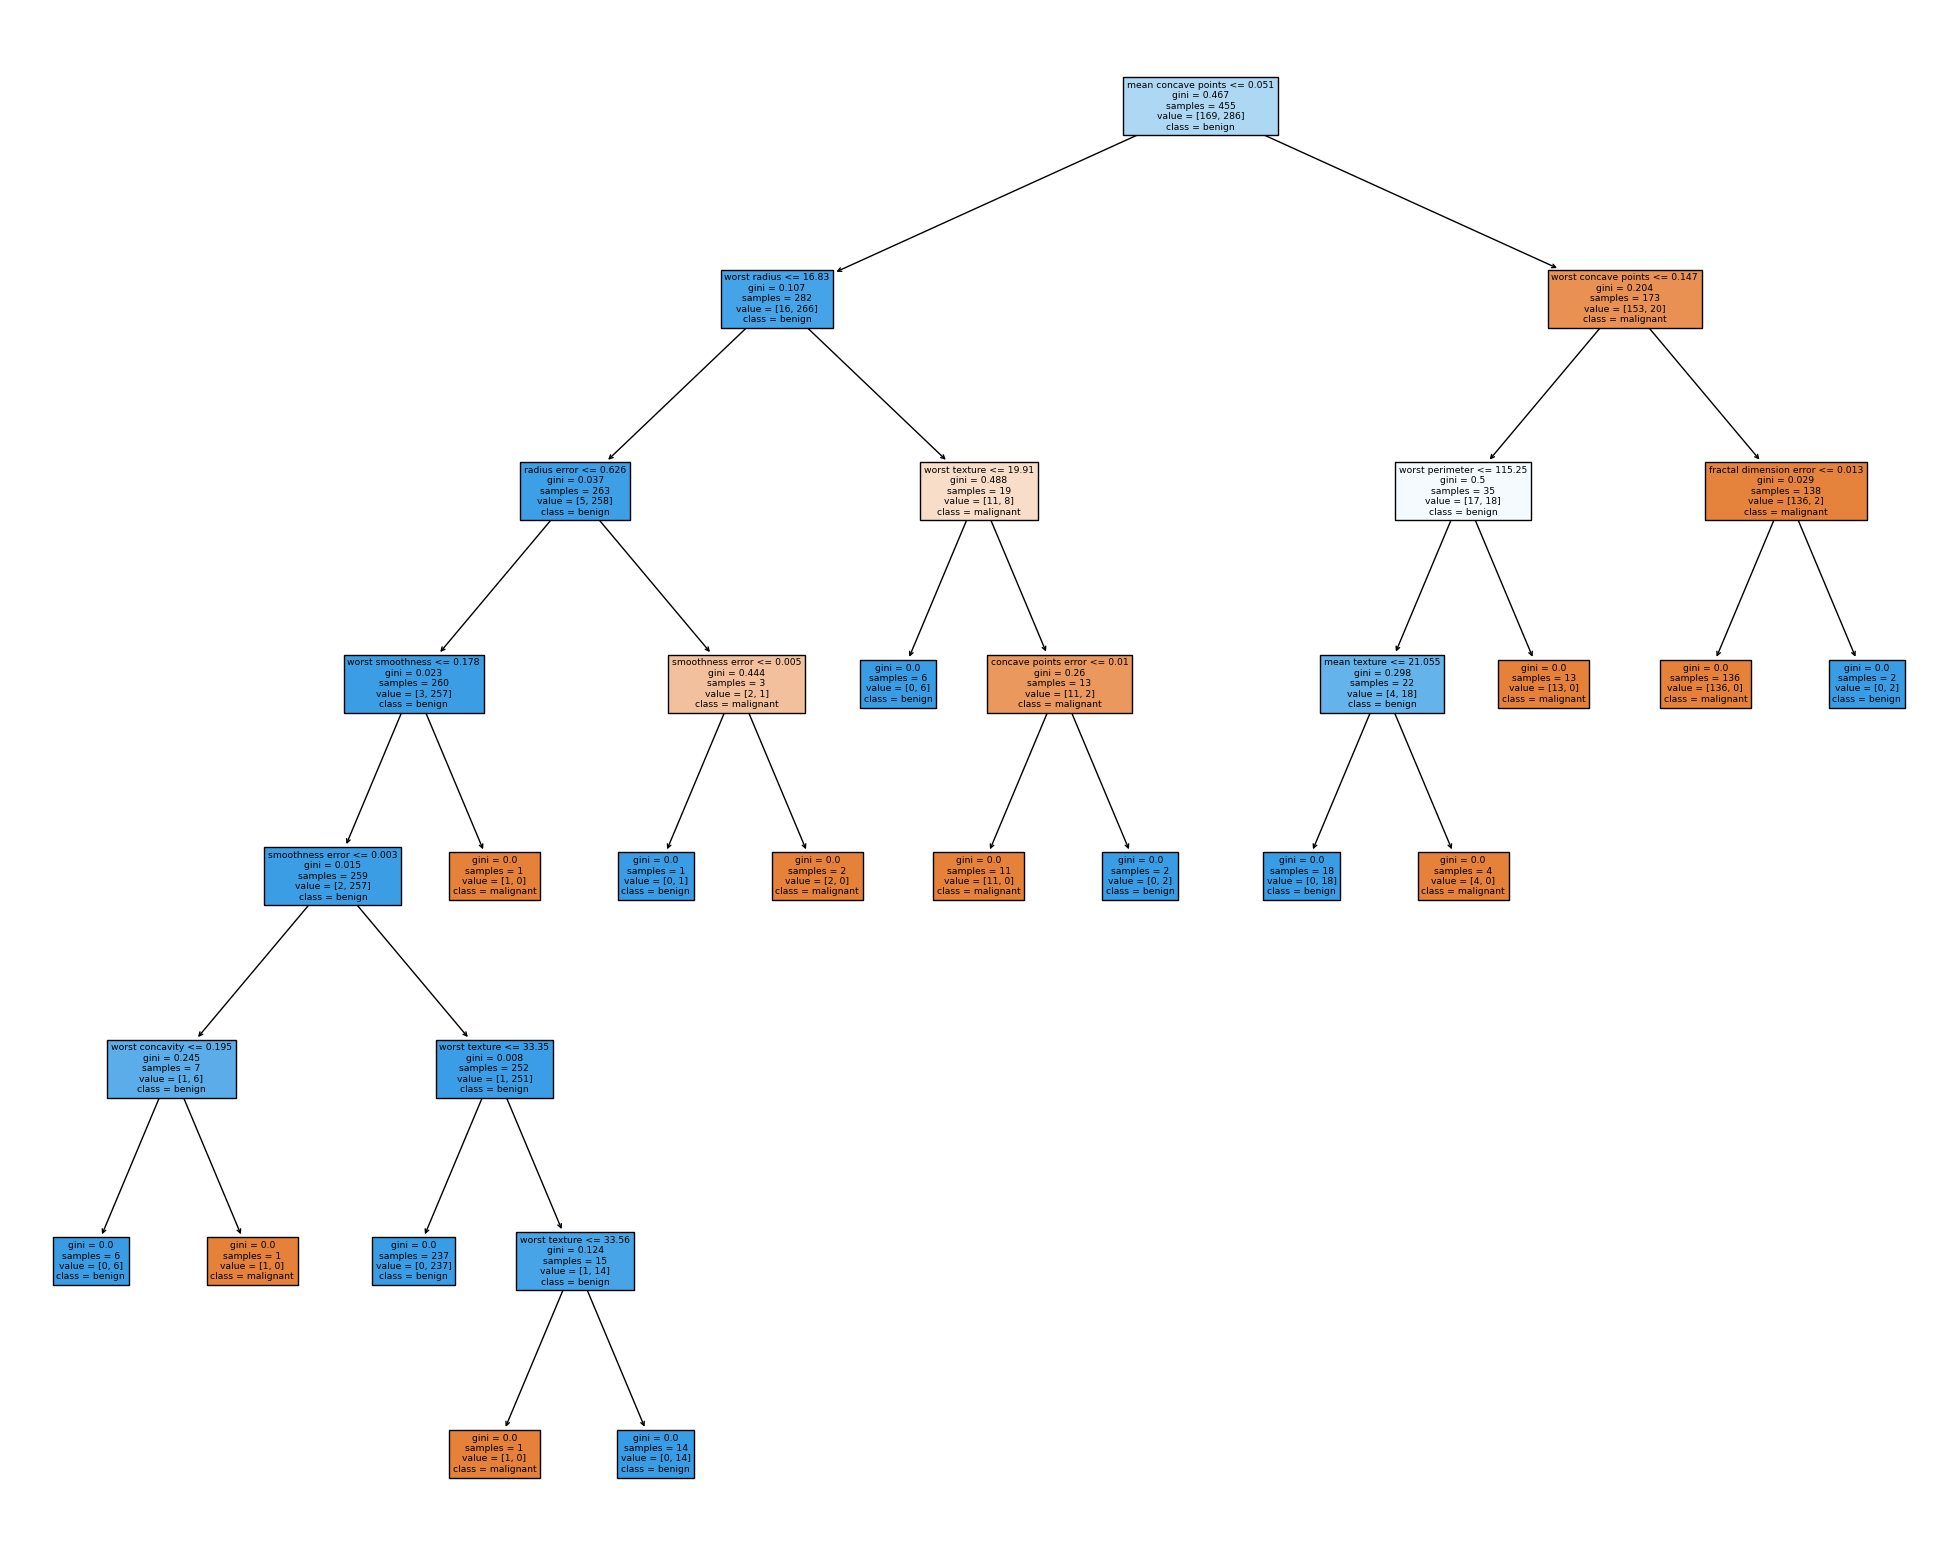

In [138]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree, 
                   feature_names=dataset.feature_names,  
                   class_names=dataset.target_names,
                   filled=True)

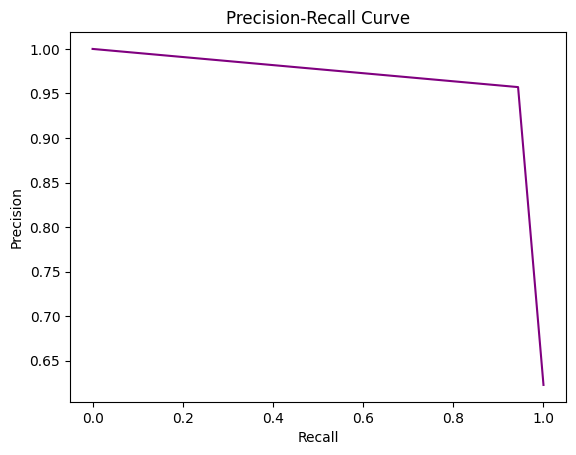

In [107]:
p, r, thresholds = precision_recall_curve(y_test, predictions)
fig, ax = plt.subplots()
ax.plot(r, p, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()


/Users/aishakothare/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


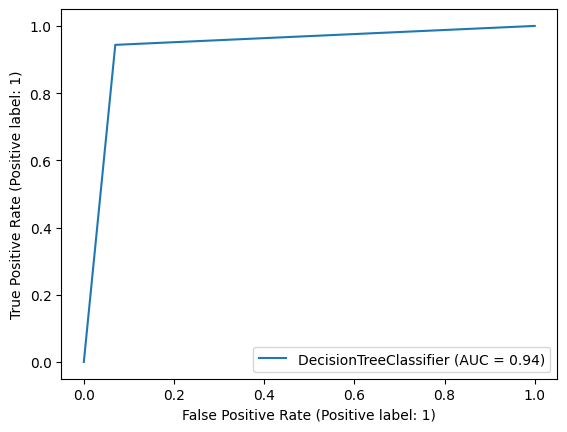

In [108]:
metrics.plot_roc_curve(decision_tree,X_test,y_test)

## Decision tree binary classifier for max depth 1

In [109]:
decision_tree_depth1 = DecisionTreeClassifier(random_state=0, max_depth=1)
cross_val_score(decision_tree, X ,Y_df, cv=10)

array([0.96491228, 0.84210526, 0.9122807 , 0.89473684, 0.92982456,
       0.89473684, 0.9122807 , 0.94736842, 0.92982456, 0.94642857])

In [110]:
decision_tree_depth1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=1, random_state=0)

In [111]:
depth2 = decision_tree_depth1.max_depth
depth2

1

In [112]:
print('Leaves of tree: ',decision_tree_depth1.get_n_leaves())

Leaves of tree:  2


In [113]:
train_score=decision_tree_depth1.score(X_train,y_train,sample_weight=None)
test_score=decision_tree_depth1.score(X_test,y_test,sample_weight=None)
print('Train Score: ',train_score)
print('Test Score: ',test_score)

Train Score:  0.9208791208791208
Test Score:  0.8947368421052632


In [114]:
predictions_2 = decision_tree_depth1.predict(X_test)

In [115]:
cm1 = confusion_matrix(y_test, predictions_2)

TN2, FP2, FN2, TP2 = confusion_matrix(y_test, predictions_2).ravel()

print('True Positive(TP)  = ', TP2)
print('False Positive(FP) = ', FP2)
print('True Negative(TN)  = ', TN2)
print('False Negative(FN) = ', FN2)

True Positive(TP)  =  63
False Positive(FP) =  4
True Negative(TN)  =  39
False Negative(FN) =  8


/Users/aishakothare/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


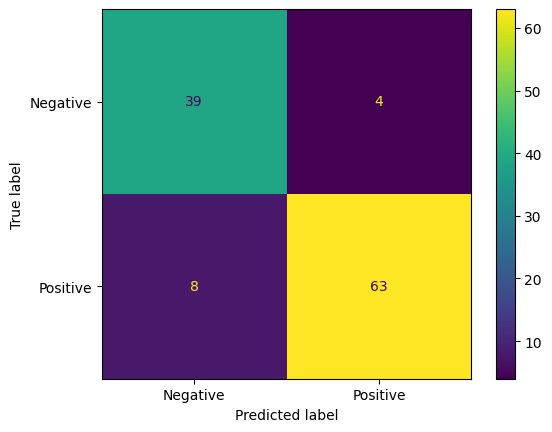

In [125]:
metrics.plot_confusion_matrix(decision_tree_depth1, X_test, y_test, display_labels=['Negative', 'Positive'])

In [149]:
accuracy2 =  accuracy_score(y_test,predictions_2)
precision2 = precision_score(y_test, predictions_2).ravel()
recall2 = recall_score(y_test, predictions_2).ravel()
f12 = f1_score(y_test, predictions_2)
print('Accuracy of the binary classifier height 1 = {:0.3f}'.format(accuracy2))
print('Precision of the binary classifier = {:0.3f}'.format(precision2[0]))
print('Recall of the binary classifier = {:0.3f}'.format(recall2[0]))
print('F1 score of the binary classifier = {:0.3f}'.format(f12))

Accuracy of the binary classifier height 1 = 0.895
Precision of the binary classifier = 0.940
Recall of the binary classifier = 0.887
F1 score of the binary classifier = 0.913


In [117]:
print("Classification report for depth 1:\n%s\n",(classification_report(y_test,predictions_2)))

Classification report for depth 1:
%s
               precision    recall  f1-score   support

           0       0.83      0.91      0.87        43
           1       0.94      0.89      0.91        71

    accuracy                           0.89       114
   macro avg       0.89      0.90      0.89       114
weighted avg       0.90      0.89      0.90       114



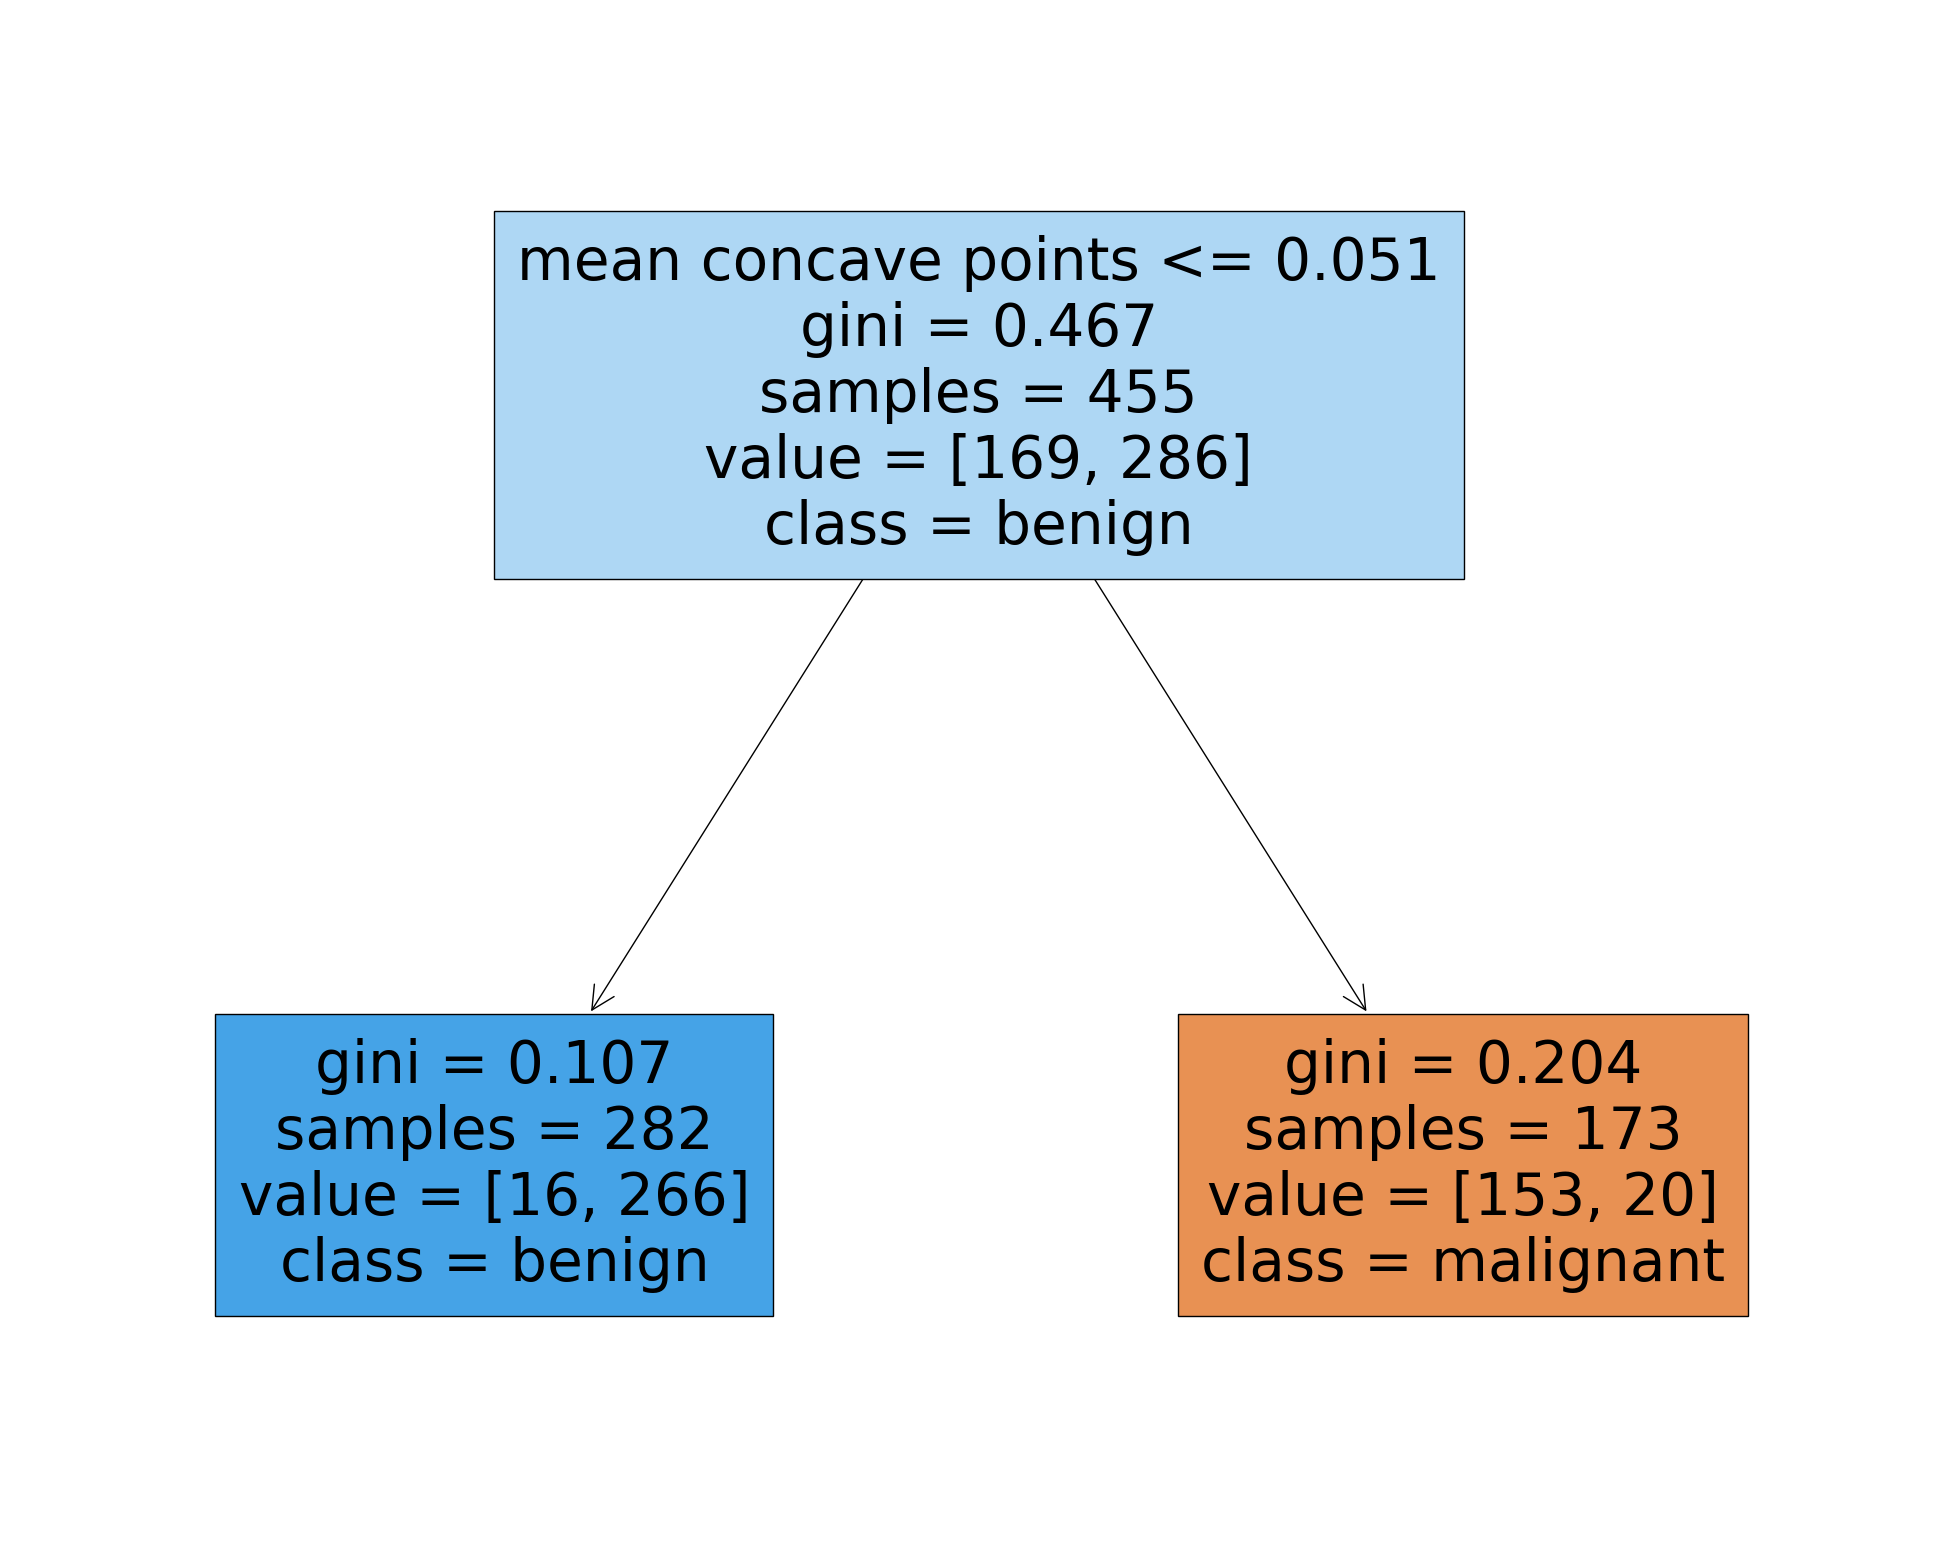

In [137]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree_depth1, 
                   feature_names=dataset.feature_names,  
                   class_names=dataset.target_names,
                   filled=True)

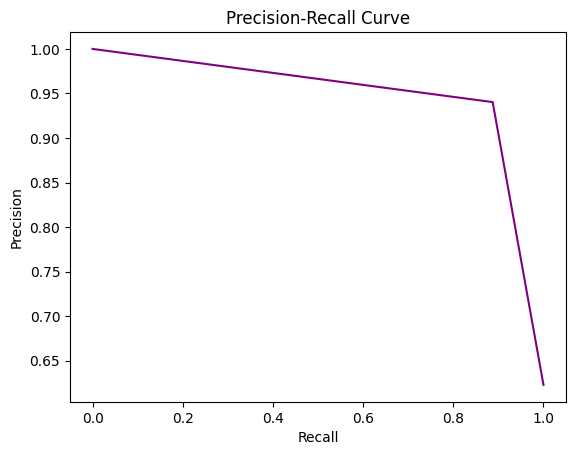

In [141]:
p2, r2, thresholds = precision_recall_curve(y_test, predictions_2)
fig, ax = plt.subplots()
ax.plot(r2, p2, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()



/Users/aishakothare/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


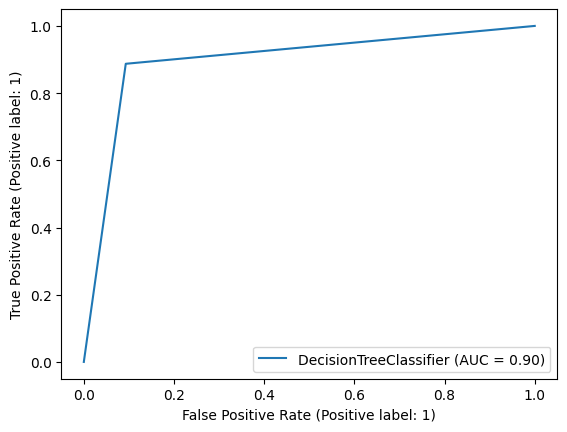

In [120]:
from sklearn import metrics
metrics.plot_roc_curve(decision_tree_depth1,X_test,y_test)

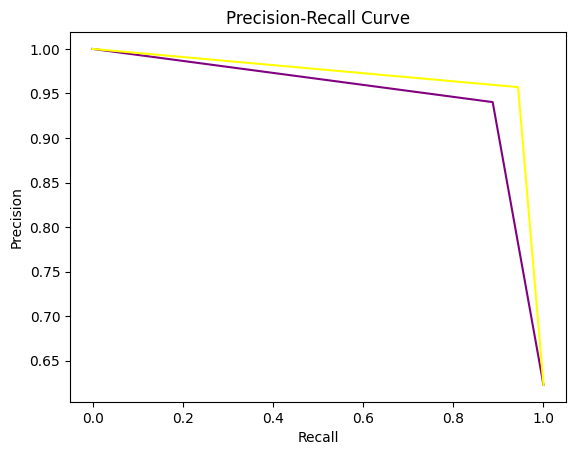

In [152]:
fig, ax = plt.subplots()
ax.plot(r2, p2, color='purple')
ax.plot(r, p, color='yellow')
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()



/Users/aishakothare/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/aishakothare/opt/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


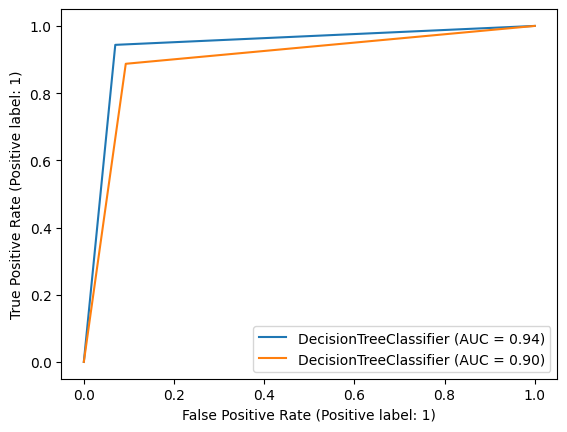

In [155]:
classifiers = [decision_tree,decision_tree_depth1]
ax = plt.gca()
for i in classifiers:
    metrics.plot_roc_curve(i, X_test, y_test, ax=ax)

### Report comparing the 6 metrics 
<ol>
    <li>Accuracy: The depth of the decision tree may lead to overfititng of the data since entire possibilities get pruned and hence it can be seen that the tree with more depth has more accuracy (93%)than the tree with max depth 1 (89%). In general to avoid overfitting its a good call to avoid a large depth. This also makes the model way more complex. </li>
    <li>Precision and recall: It can be seen that the precision and recall for first case are 95% and 94% respecitively and for the second case are the precision and recall are 94% and 88 % respectively. This implies that the precision in our case is mostly around the % which means that both models are correctly able to identiy if a tumour is malignant or benign. But in case of recall it is seen that the first case with a deeper tree is more sensitive to correctly predicting the tumour than the one with max depth as 1.</li>
    <li>Classification Report: based on the classification report we can clearly see that metrics for the decision tree with depth 7 are more solid and promising than the one with dept 1</li>
    <li>ROC curve: Both the curves obtained are giving pretty good results, rather very similar.Based on this statistic we can see that model with depth 7 is slightly better than model with depth 1. </li>
    <li>Precision/recall curve: Based on this statistic alone we can see that area covered by curve from modelt depth 7 is closer to 1 than that covered by model with dept 1</li>
</ol>
Hence based on my observation, the model with depth 7 has greater benefits.